<a href="https://colab.research.google.com/github/jonathanahc/Practicas/blob/main/Pr%C3%A1ctica_21_Ejercicios_con_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA completo**

## Carga de datos

Importación de librerías

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Extracción y carga de los datos

In [64]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
columnas = ['age', 'year', 'nodes', 'status']
df = pd.read_csv(url, header=None, names=columnas)

Muestra las primeras filas del dataset

In [65]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Muestra el nombre y tipo de dato de las columnas

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## Análisis estadístico

Estadística descriptiva

In [67]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Moda de cada columna

In [68]:
moda = df.mode().iloc[0]
moda

,0
age,52
year,58
nodes,0
status,1


Mediana de cada columna

In [70]:
mediana = df.median()
mediana

,0
age,52.0
year,63.0
nodes,1.0
status,1.0


## Histogramas para las columnas numéricas

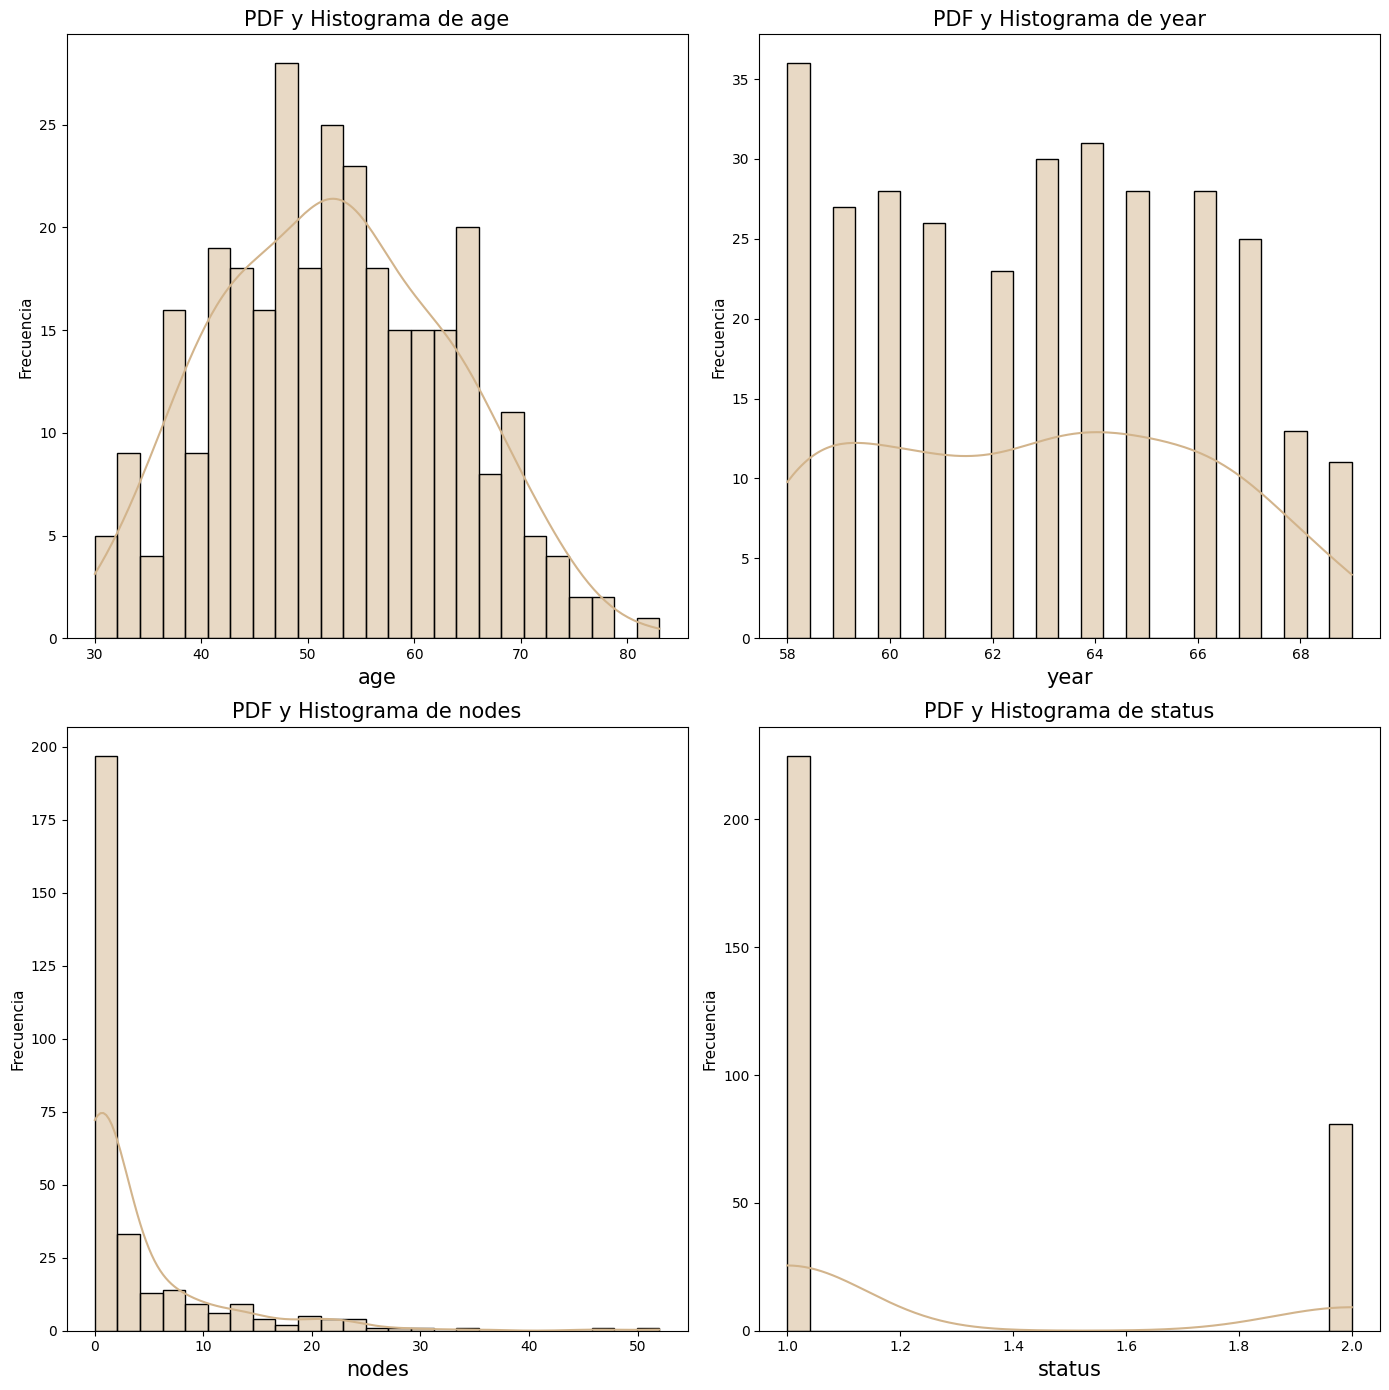

In [71]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=25, color='tan')
    plt.title(f'PDF y Histograma de {col}', fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Frecuencia', fontsize=11)

plt.tight_layout()
plt.show()

## Gráfica de barras para la columna categórica Status

<ipython-input-72-7f9f95c850ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_conteo.index, y=status_conteo.values, width=0.5, palette=['greenyellow', 'orange'])


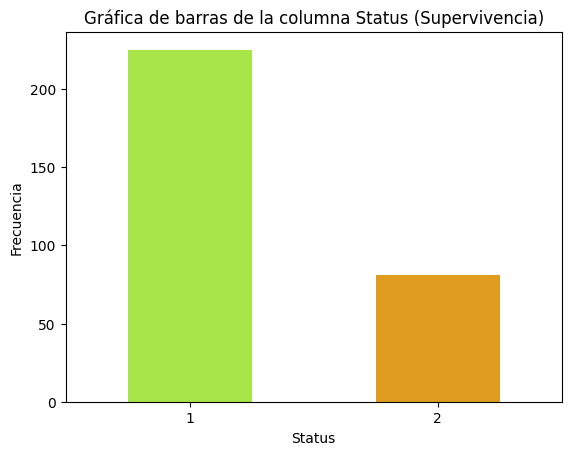

In [72]:
status_conteo = df['status'].value_counts()

sns.barplot(x=status_conteo.index, y=status_conteo.values, width=0.5, palette=['greenyellow', 'orange'])
plt.title('Gráfica de barras de la columna Status (Supervivencia)')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.show()

## Boxplots para identificar outliers en las columnas numéricas

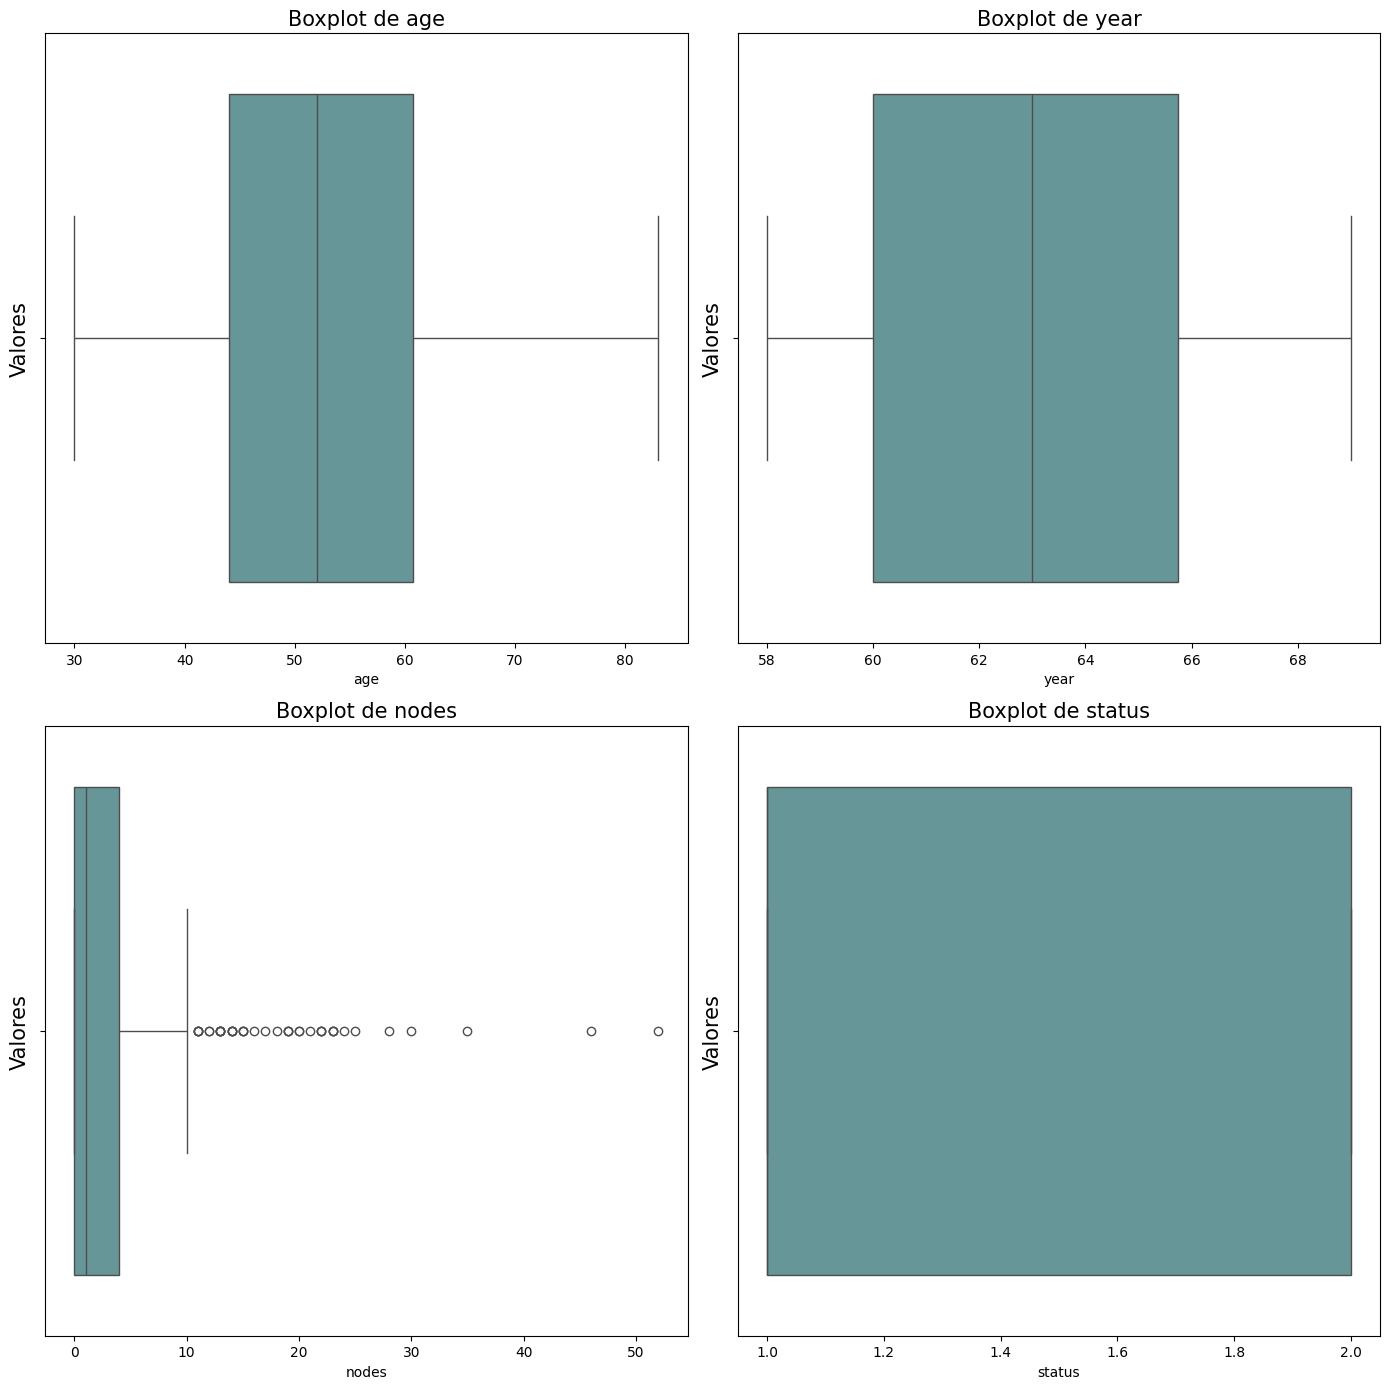

In [73]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col].dropna(), color='cadetblue')
    plt.title(f'Boxplot de {col}', fontsize=15)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Valores', fontsize=15)
plt.tight_layout()
plt.show()

## Matriz de correlación y mapa de calor

Muestra la matriz de correlación

In [74]:
matriz_correlacion = df.corr()

matriz_correlacion

,age,year,nodes,status
age,1.000000,0.089529,-0.063176,0.067950
year,0.089529,1.000000,-0.003764,-0.004768
nodes,-0.063176,-0.003764,1.000000,0.286768
status,0.067950,-0.004768,0.286768,1.000000


Muestra el mapa de calor

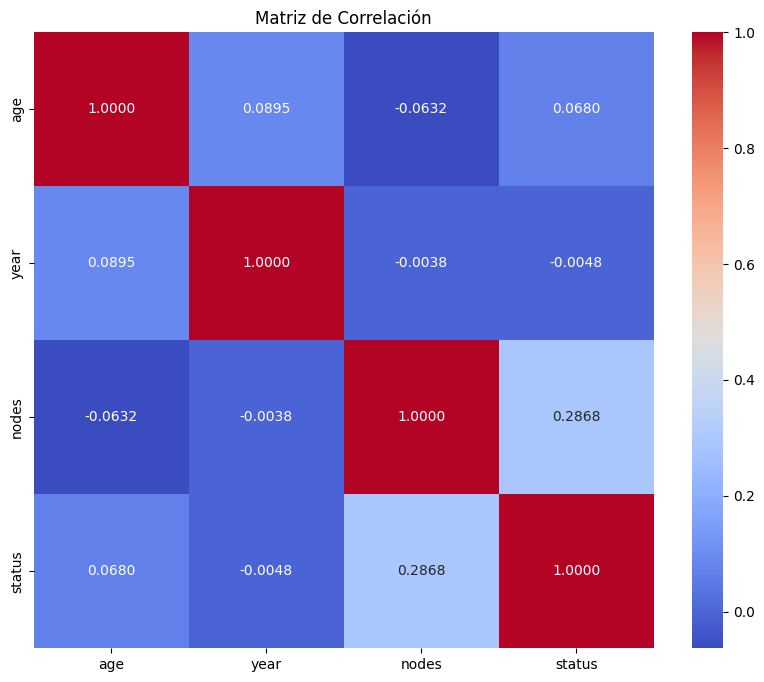

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Matriz de Correlación')
plt.show()

## Pairplot de las relaciones entre variables númericas

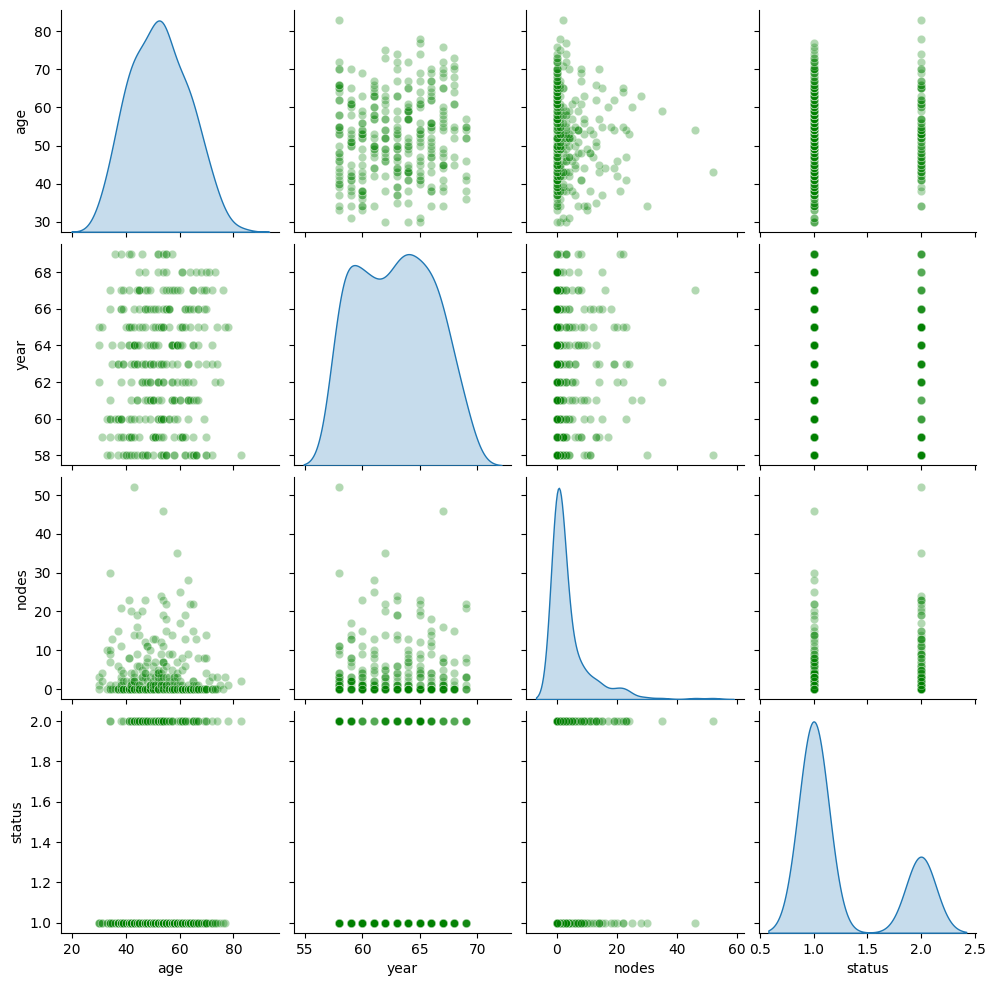

In [76]:
sns.pairplot(df, plot_kws={'alpha': 0.3, 'color': 'green'}, diag_kind='kde')
plt.show()

## Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot

Aplicación de pruebas de normalidad

In [77]:
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

Gráficación de QQ-Plot

In [78]:
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="tan")
    plt.title(f"Distribución de {column_name}")

    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

Muestra de resultados

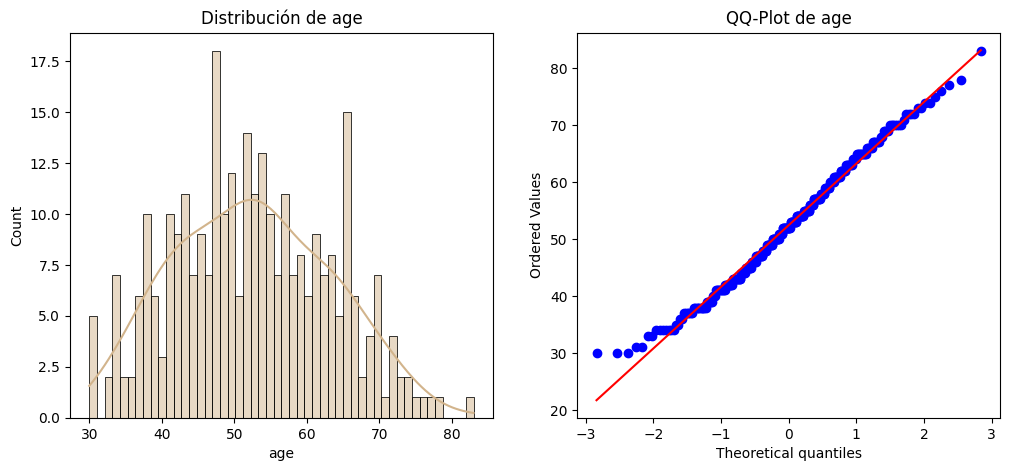


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.02605
Kolmogorov-Smirnov Test: p-valor = 0.46980
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00780


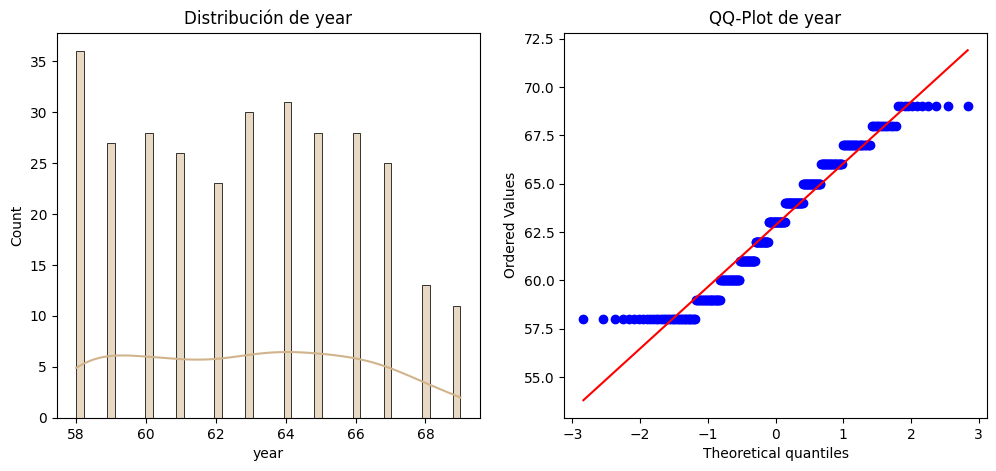


Pruebas de normalidad para la columna: year
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00158
Anderson-Darling Test: Estadístico = 4.31374
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


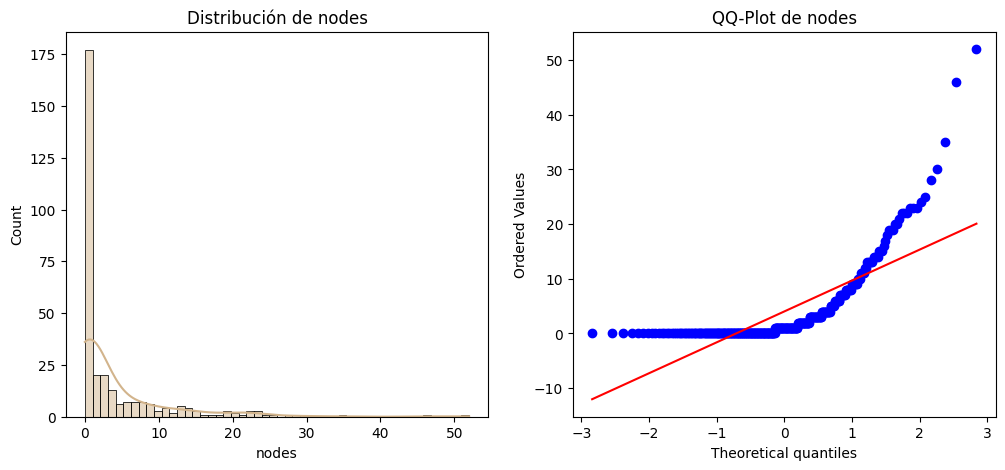


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 39.68662
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


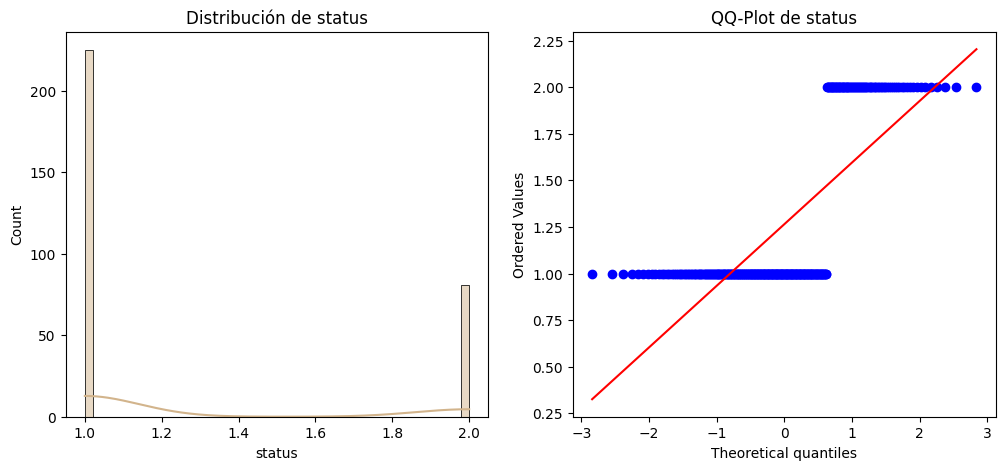


Pruebas de normalidad para la columna: status
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 71.18230
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [79]:
for column in df:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)

# Identificación y tratamiento de los datos faltantes

Validación de valores nulos

In [80]:
df.isnull().sum()

,0
age,0
year,0
nodes,0
status,0


Muestra de los valores únicos en cada columna

In [81]:
for column in df.columns:
  print(f"Valores únicos para la columna '{column}':")
  print(df[column].unique())
  print("\n")

Valores únicos para la columna 'age':
[30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 83]


Valores únicos para la columna 'year':
[64 62 65 59 58 60 66 61 67 63 69 68]


Valores únicos para la columna 'nodes':
[ 1  3  0  2  4 10  9 30  7 13  6 15 21 11  5 23  8 20 52 14 19 16 12 24
 46 18 22 35 17 25 28]


Valores únicos para la columna 'status':
[1 2]




Conteo de cada valor único en cada columna

In [82]:
for column in df.columns:
  print(f"Conteo de valores únicos para la columna '{column}':")
  print(df[column].value_counts())
  print("\n")

Conteo de valores únicos para la columna 'age':
age
52    14
54    13
50    12
43    11
57    11
53    11
47    11
41    10
38    10
65    10
55    10
49    10
42     9
45     9
61     9
63     8
59     8
34     7
44     7
46     7
58     7
62     7
56     7
70     7
48     7
60     6
51     6
67     6
39     6
37     6
64     5
66     5
69     4
72     4
30     3
40     3
36     2
35     2
33     2
31     2
68     2
74     2
73     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64


Conteo de valores únicos para la columna 'year':
year
58    36
64    31
63    30
65    28
66    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: count, dtype: int64


Conteo de valores únicos para la columna 'nodes':
nodes
0     136
1      41
3      20
2      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
22      3
23      3
19      3
12      2
20      2
30      1
21      1
52      1
16 

En el caso de la columna Nodes, se aplicó una imputación por media (mediana) para sustituir los valores 0

In [83]:
df['nodes'].replace(0, df['nodes'].median(), inplace=True)

<ipython-input-83-dfb8ff0b8e72>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nodes'].replace(0, df['nodes'].median(), inplace=True)


# EDA completo después del tratamiento de datos

## Análisis estadístico

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [85]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.470588,1.264706
std,10.803452,3.249405,6.953295,0.441899
min,30.000000,58.000000,1.000000,1.000000
25%,44.000000,60.000000,1.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [86]:
moda = df.mode().iloc[0]
moda

,0
age,52
year,58
nodes,1
status,1


In [87]:
mediana = df.median()
mediana

,0
age,52.0
year,63.0
nodes,1.0
status,1.0


## Histogramas para las columnas numéricas

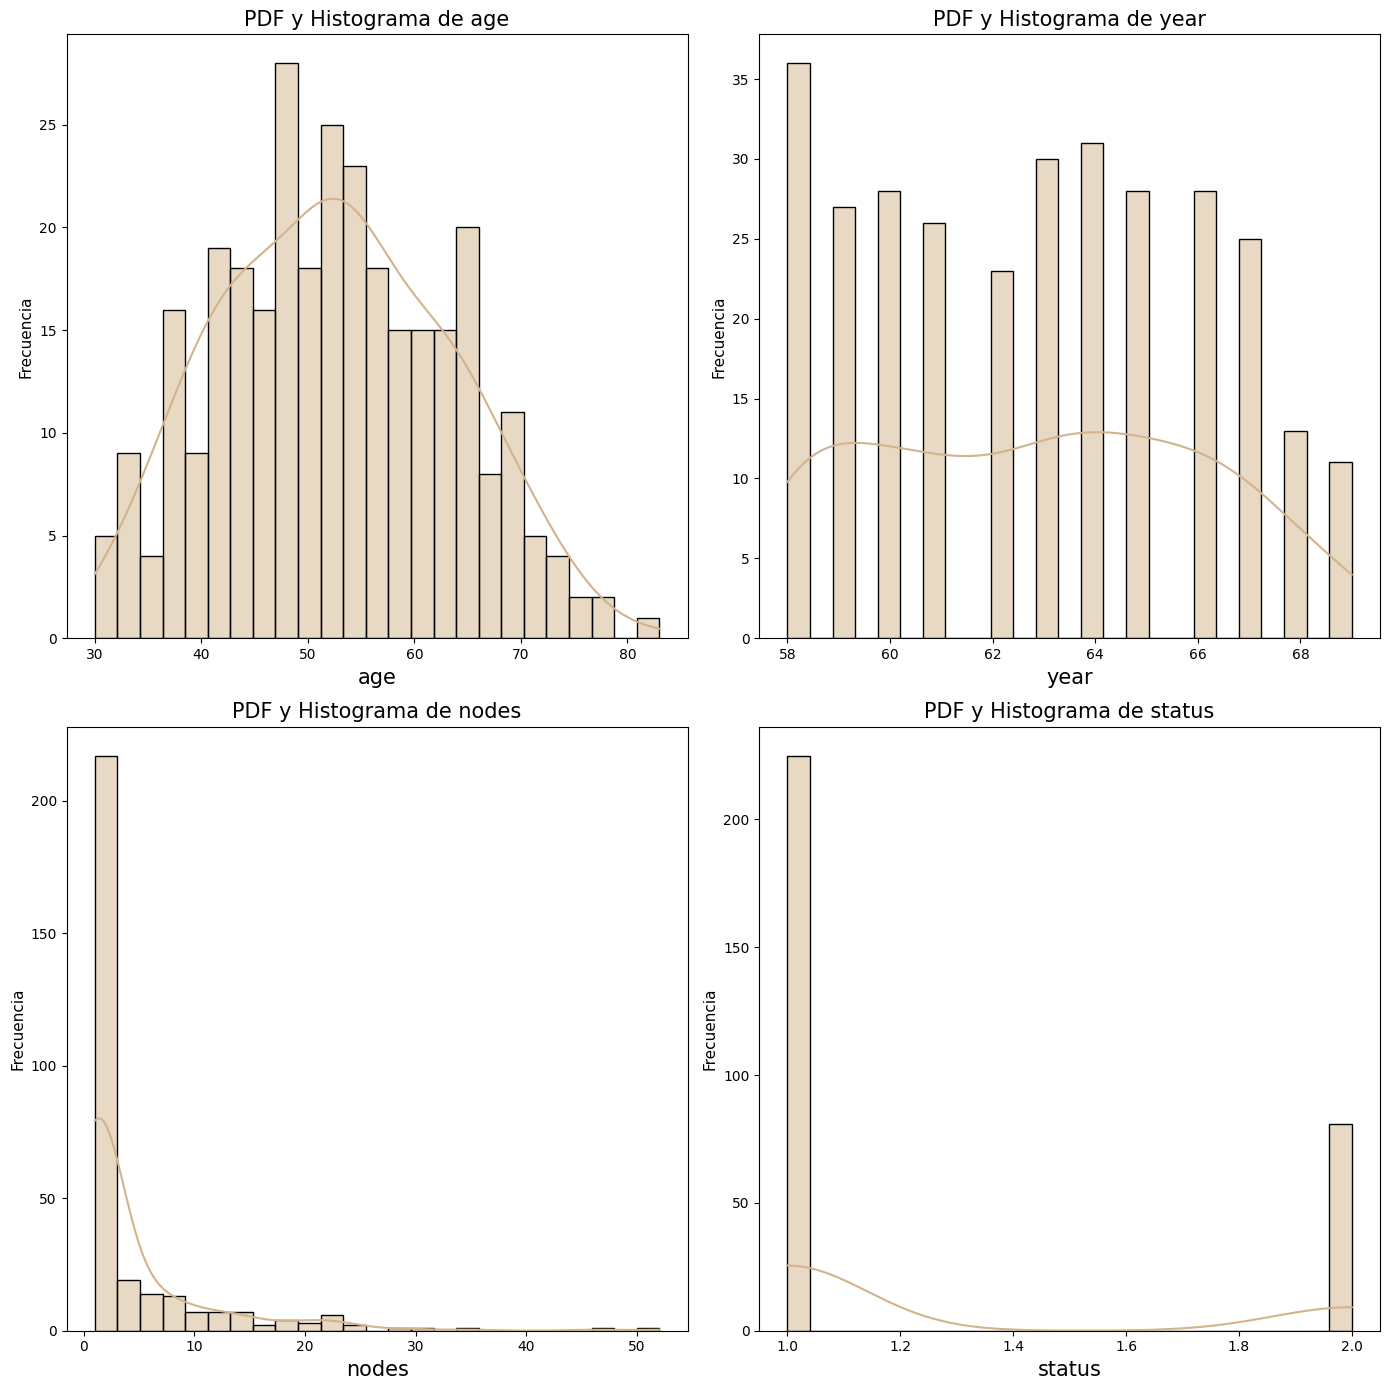

In [88]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=25, color='tan')
    plt.title(f'PDF y Histograma de {col}', fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Frecuencia', fontsize=11)

plt.tight_layout()
plt.show()

## Gráfica de barras para la columna categórica Status

<ipython-input-89-7f9f95c850ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_conteo.index, y=status_conteo.values, width=0.5, palette=['greenyellow', 'orange'])


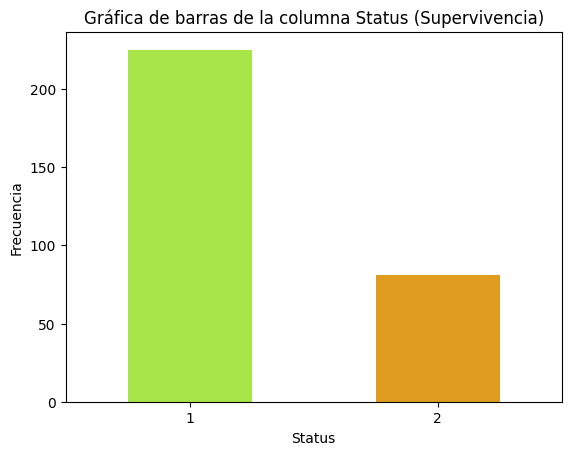

In [89]:
status_conteo = df['status'].value_counts()

sns.barplot(x=status_conteo.index, y=status_conteo.values, width=0.5, palette=['greenyellow', 'orange'])
plt.title('Gráfica de barras de la columna Status (Supervivencia)')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.show()

## Boxplots para identificar outliers en las columnas numéricas

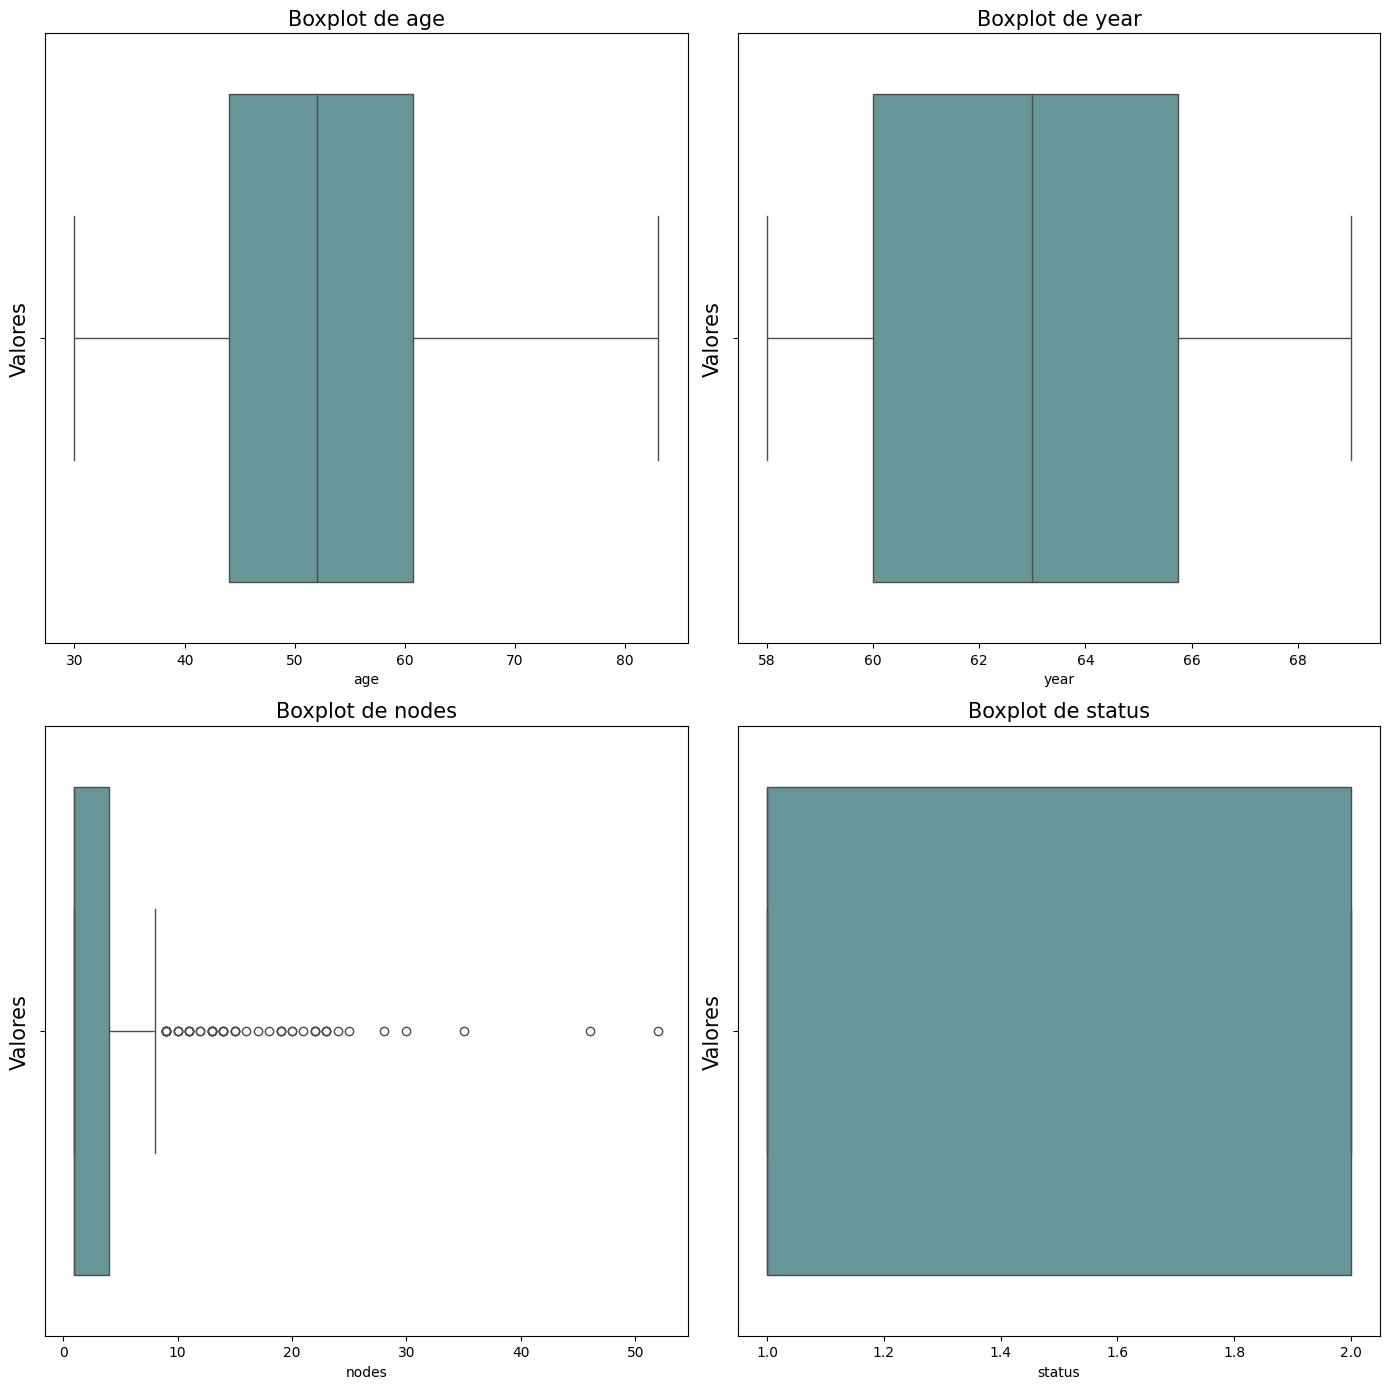

In [90]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col].dropna(), color='cadetblue')
    plt.title(f'Boxplot de {col}', fontsize=15)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Valores', fontsize=15)
plt.tight_layout()
plt.show()

## Matriz de correlación y mapa de calor

In [91]:
matriz_correlacion = df.corr()

matriz_correlacion

,age,year,nodes,status
age,1.000000,0.089529,-0.057913,0.067950
year,0.089529,1.000000,0.001041,-0.004768
nodes,-0.057913,0.001041,1.000000,0.278376
status,0.067950,-0.004768,0.278376,1.000000


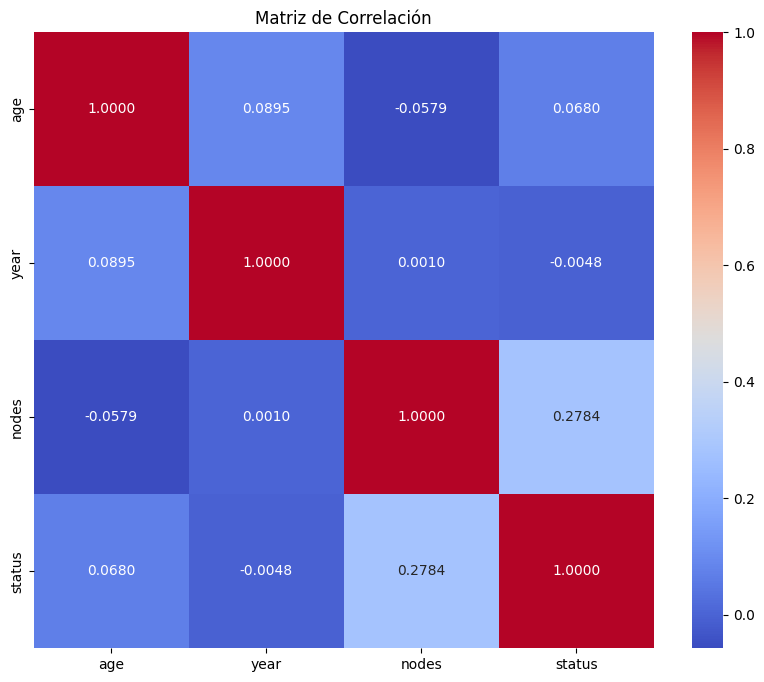

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Matriz de Correlación')
plt.show()

## Pairplot de las relaciones entre variables numéricas

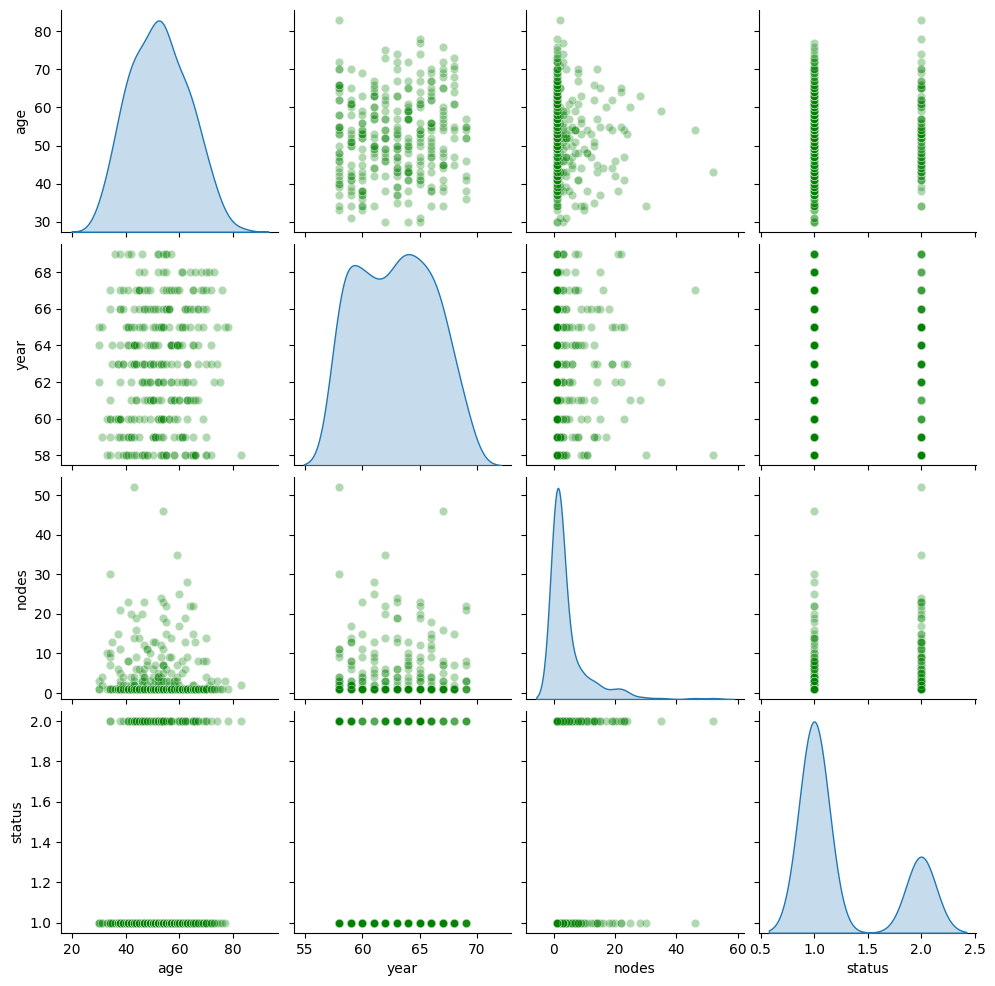

In [93]:
sns.pairplot(df, plot_kws={'alpha': 0.3, 'color': 'green'}, diag_kind='kde')
plt.show()

## Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot

In [94]:
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

In [95]:
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

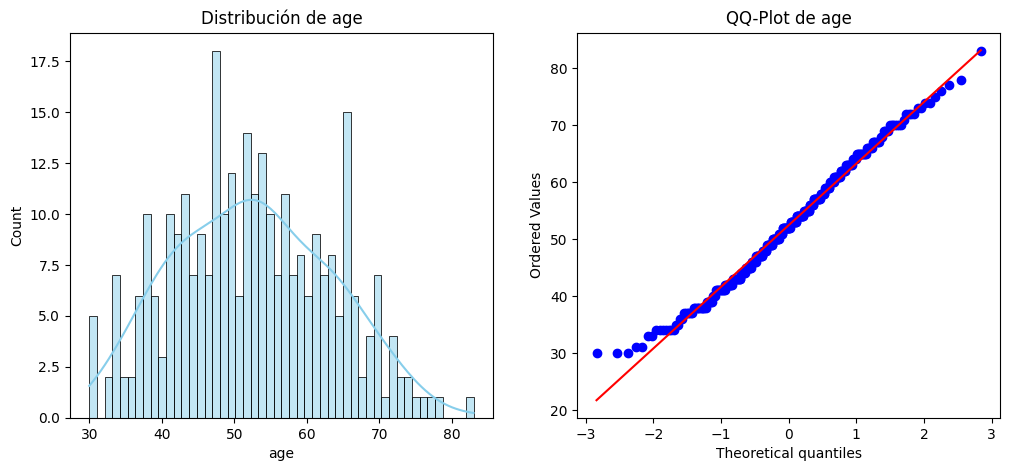


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.02605
Kolmogorov-Smirnov Test: p-valor = 0.46980
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00780


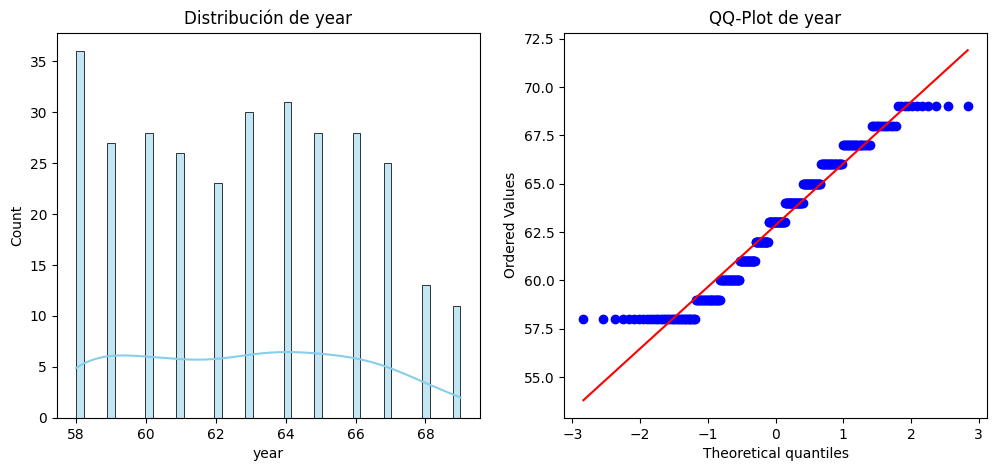


Pruebas de normalidad para la columna: year
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00158
Anderson-Darling Test: Estadístico = 4.31374
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


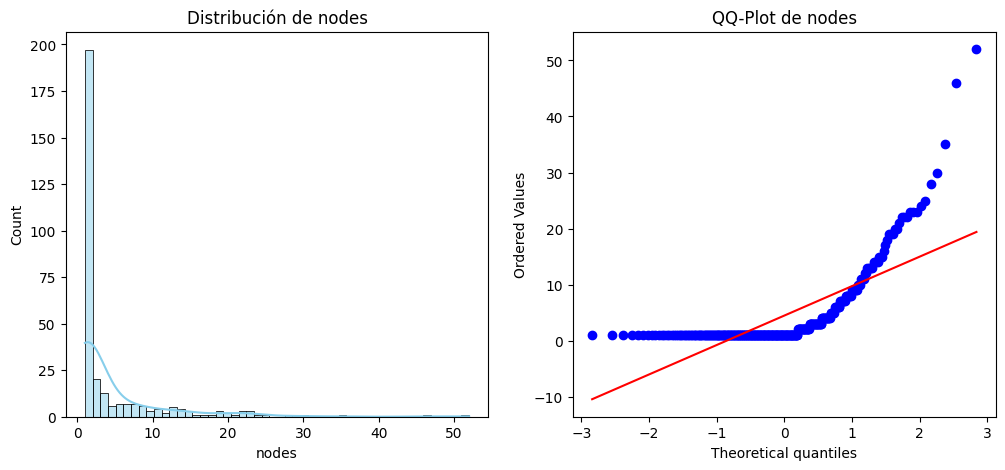


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 47.60590
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


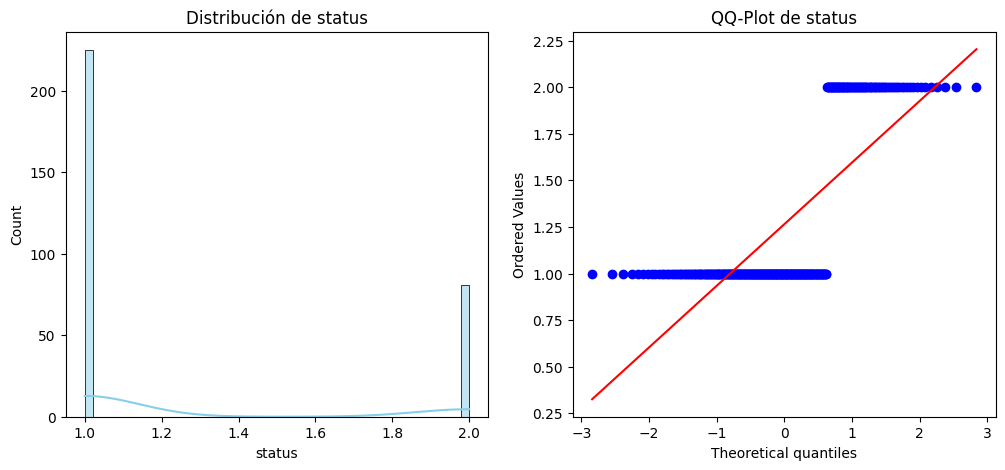


Pruebas de normalidad para la columna: status
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 71.18230
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [96]:
for column in df:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)